<a href="https://colab.research.google.com/github/deep5050/PPI-analysis/blob/master/genomics_common_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# NECESSARY FUNCTIONS

In [0]:
from collections import OrderedDict

def revs_complement(dna):
    """
    help function for orf_identifier:
    to transform a sequence to reverse complementary sequence
    """
    pairs = {"A": "T", "C": "G", "G": "C", "T": "A"} # complementary code
    c_dna = [pairs[s] for s in dna] # complementary replace
    return "".join(c_dna)[::-1].strip() # reverse

def find_repeats( dna, n):
    """
    This help function for repeats_identifier find and count repeats for 
    each dna sequence
    dna: sequence, string
    n: number of repeats, int
    """
    repeats = {}
    for i in range(0, len(dna)):
        repeat = dna[i:i+n] # generate possible repeats
        if len(repeat) == n:
            if repeat not in repeats:
                repeats [repeat] = 1 # initiate record
            else:
                # count repeated repeats
                repeats[repeat] = repeats.get(repeat) + 1
    return dict(sorted(repeats.items()))

def get_seq_str(content):
  seq_str = ''
  seq = content[1:] # avoiding the header started with '>'
  for seq_ in seq:
    seq_str += str(seq_).replace('\n', '').replace('\r', '').replace(' ','')
  return seq_str.upper().strip()

def get_seq_neum(seq_str):
  table = {'A':'1','T':'2','G':'3','C':'4'}
  # seq_neum = seq_str.replace('A','1').replace('T','2').replace('G','3').replace('C','4')
  seq_neum = [ table[s] for s in seq_str]
  return "".join(seq_neum).strip()

def get_unique_patterns(dna,n):
  repeats = []
  for i in range(0, len(dna)):
    repeat = dna[i:i+n] # generate possible repeats
    if len(repeat) == n:
         repeats.append(repeat)
  return sorted(list(dict.fromkeys(repeats))) #eliminate duplicates

def get_seq_yr(seq_neum):
  table = { '1':'R','3':'R','2':'Y','4':'Y'}
  seq_yr = [ table[s] for s in seq_neum]
  # seq_yr = seq_neum.replace('1','R').replace('2','Y').replace('3','R').replace('4','Y')
  return "".join(seq_yr).strip()

def get_seq_yr_from_atcg(seq):
  table = { 'A':'R','G':'R','C':'Y','T':'Y'}
  seq_yr = [ table[s] for s in seq]
  # seq_yr = seq_neum.replace('1','R').replace('2','Y').replace('3','R').replace('4','Y')
  return "".join(seq_yr).strip()

def get_repeats_with_loc(dna,n):
  # get a sorted list of unique patterns
  patterns = get_unique_patterns(dna,n)
  #create a dictionary with pattern and its loc in the list
  patterns_loc = {}
  # to hold actual loc
  locs = []
  for k in range(0,len(patterns)):
    locs.append([])

  for i in range(0,len(patterns)):
    patterns_loc[patterns[i]] = i #insert the loc

  print(patterns_loc)
  # now actually including all the locs
  for i in range(0,len(dna)):
    repeat = dna[i:i+n]
    if len(repeat)==n:
      # get the location (where to be inserted in the pattern_loc) of the pattern just found
      arr_loc = patterns_loc[repeat]
      # print("arrloc{}".format(arr_loc))
      # include the actual location of occurance in dna
      locs[arr_loc].append(i)

  #returns the loc of each unique pattern as an array of array
  return locs

%matplotlib inline

def plot_protein_distr_by_name(dna):
  # protein distribution
  proteins = translate(seq_str)
  proteins_repeats = find_repeats(proteins,1)
  #
  frq_protein = list(proteins_repeats.values())
  proteins_names = list(proteins_repeats.keys())
  fig = plt.figure(figsize=[10,5])

  
  plt.bar(proteins_names,frq_protein,width=0.7,color='y')
  plt.title("PRODUCED PROTEINS FREQUENCY - sorted: name")
  plt.show()

def plot_protein_distr_by_frq(dna):
  # protein distribution
  proteins = translate(seq_str)
  proteins_repeats = find_repeats(proteins,1)
  # sort by values
  proteins_repeats = {k: v for k, v in sorted(proteins_repeats.items(), key=lambda item: item[1])}
  frq_protein = list(proteins_repeats.values())
  proteins_names = list(proteins_repeats.keys())
  fig = plt.figure(figsize=[10,5])

  
  plt.bar(proteins_names,frq_protein,width=0.7,color='r')
  plt.title("PRODUCED PROTEINS FREQUENCY - sorted: frqncy")
  plt.show()



def plot_pattern_distr_by_name(dna):
  codon_repeats = find_repeats(dna,3)
  frq = list(codon_repeats.values())
  seq_x = list(codon_repeats.keys())
  
  fig = plt.figure(figsize=[4,4])

  plt.bar(seq_x,frq,width=0.5)
  plt.ylabel('frequency')
  plt.title("CODON DISTRIBUTION - sorted: name")
  plt.show()



def plot_pattern_distr_by_frq(dna):
  codon_repeats = find_repeats(dna,3)
  codon_repeats = {k: v for k, v in sorted(codon_repeats.items(), key=lambda item: item[1])}
  frq = list(codon_repeats.values())
  seq_x = list(codon_repeats.keys())
  
  fig = plt.figure(figsize=[4,4])

  plt.bar(seq_x,frq,width=0.5,color='g')
  plt.ylabel('frequency')
  plt.title("CODON DISTRIBUTION - sorted: frqncy")
  plt.show() 








def percent_of_occurence(seq):
  repeats_ = find_repeats(seq,3)
  total_occur = 0
  percent_dist = {}
  for rpt in repeats_:
    total_occur += repeats_[rpt]
  # print("total",total_occur)
  for rpt in repeats_:
    percent_dist[rpt] = (repeats_[rpt]/total_occur)*100
  percents = [ per for per in percent_dist.values() ]
  return percent_dist,percents




def print_pattern_wise_locs(patterns,locs):
  patterns = patterns
  locs = locs
  for i in range(0,len(patterns)):
    print("Patterns:    {} | length: {} | loc: {}".format(patterns[i],len(locs[i]),locs[i]))



def translate(seq): 
       
    table = { 
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W', 
    } 
    protein ="" 
    if len(seq)%3 == 0: 
        for i in range(0, len(seq), 3): 
            codon = seq[i:i + 3] 
            protein+= table[codon] 
    return protein 

In [0]:

from os import listdir
from os.path import isfile, join

# trying to find common patterns of length 3 among all the genes
def common_patterns_diff_lengths_among_all(my_path_,length_,MODE='ATCG'):
  my_path = my_path_
  only_files = [f for f in listdir(my_path) if isfile(join(my_path, f))]
  all_seq = []
  file_names = []
  for file_ in only_files:

    file_path = my_path+'/'+file_
    file_names.append(file_.split('.txt')[0])

    with open(file_path,'r') as f:
      content = f.readlines()
      seq_str = get_seq_str(content)
      if MODE == 'YR':
        seq_str = get_seq_yr_from_atcg(seq_str)
      all_seq.append(seq_str)

    uniq_patterns = []
    for seq in all_seq:
      patt = get_unique_patterns(seq,length_)
      uniq_patterns.append(patt)

  # print(len(uniq_patterns))

  # print(uniq_patterns[0])
  # print(uniq_patterns[1])
  # xx = set(uniq_patterns[0]) & set(uniq_patterns[1])
  # print(sorted(xx))

  common_pattern_among_all = set(uniq_patterns[0])
  for i in range(0,len(uniq_patterns)):
    # common_pattern_among_all = common_pattern_among_all.intersection(set(uniq_patterns[i]))
    common_pattern_among_all = common_pattern_among_all & set(uniq_patterns[i])

  # for patt in uniq_patterns:
    
    # print(len(patt),":",patt)

  # print('-'*50)
  print(len(common_pattern_among_all),":",sorted(common_pattern_among_all))


# FINDING PATTERNS FOR DJ1

## ATCG DISTRBUTION

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',3)

64 : ['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',4)

253 : ['AAAA', 'AAAC', 'AAAG', 'AAAT', 'AACA', 'AACC', 'AACG', 'AACT', 'AAGA', 'AAGC', 'AAGG', 'AAGT', 'AATA', 'AATC', 'AATG', 'AATT', 'ACAA', 'ACAC', 'ACAG', 'ACAT', 'ACCA', 'ACCC', 'ACCT', 'ACGA', 'ACGC', 'ACGT', 'ACTA', 'ACTC', 'ACTG', 'ACTT', 'AGAA', 'AGAC', 'AGAG', 'AGAT', 'AGCA', 'AGCC', 'AGCG', 'AGCT', 'AGGA', 'AGGC', 'AGGG', 'AGGT', 'AGTA', 'AGTC', 'AGTG', 'AGTT', 'ATAA', 'ATAC', 'ATAG', 'ATAT', 'ATCA', 'ATCC', 'ATCG', 'ATCT', 'ATGA', 'ATGC', 'ATGG', 'ATGT', 'ATTA', 'ATTC', 'ATTG', 'ATTT', 'CAAA', 'CAAC', 'CAAG', 'CAAT', 'CACA', 'CACC', 'CACG', 'CACT', 'CAGA', 'CAGC', 'CAGG', 'CAGT', 'CATA', 'CATC', 'CATG', 'CATT', 'CCAA', 'CCAC', 'CCAG', 'CCAT', 'CCCA', 'CCCC', 'CCCG', 'CCCT', 'CCGA', 'CCGC', 'CCGG', 'CCGT', 'CCTA', 'CCTC', 'CCTG', 'CCTT', 'CGAA', 'CGAC', 'CGAG', 'CGAT', 'CGCA', 'CGCC', 'CGCG', 'CGCT', 'CGGA', 'CGGC', 'CGGG', 'CGGT', 'CGTA', 'CGTC', 'CGTG', 'CGTT', 'CTAA', 'CTAC', 'CTAG', 'CTAT', 'CTCA', 'CTCC', 'CTCG', 'CTCT', 'CTGA', 'CTGC', 'CTGG', 'CTGT', 'CTTA', 'CTTC', '

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',5)

620 : ['AAAAA', 'AAAAG', 'AAAAT', 'AAACA', 'AAACC', 'AAACT', 'AAAGA', 'AAAGC', 'AAAGG', 'AAAGT', 'AAATA', 'AACAA', 'AACAG', 'AACCA', 'AACCC', 'AACTC', 'AACTG', 'AACTT', 'AAGAA', 'AAGAC', 'AAGAG', 'AAGAT', 'AAGCA', 'AAGCC', 'AAGCG', 'AAGGA', 'AAGGC', 'AAGGG', 'AAGGT', 'AAGTG', 'AAGTT', 'AATAG', 'AATCC', 'AATGA', 'AATGG', 'AATGT', 'AATTA', 'AATTC', 'AATTG', 'ACAAA', 'ACAAG', 'ACAAT', 'ACACA', 'ACACC', 'ACAGA', 'ACAGC', 'ACAGG', 'ACAGT', 'ACATA', 'ACATC', 'ACATG', 'ACCAA', 'ACCAC', 'ACCAG', 'ACCAT', 'ACCCA', 'ACCCC', 'ACCCT', 'ACCTA', 'ACCTC', 'ACCTG', 'ACCTT', 'ACGCA', 'ACTCA', 'ACTCC', 'ACTCT', 'ACTGA', 'ACTGC', 'ACTGG', 'ACTGT', 'ACTTC', 'ACTTG', 'AGAAA', 'AGAAG', 'AGAAT', 'AGACA', 'AGACC', 'AGACG', 'AGACT', 'AGAGA', 'AGAGC', 'AGAGG', 'AGAGT', 'AGATA', 'AGATC', 'AGATG', 'AGATT', 'AGCAG', 'AGCAT', 'AGCCA', 'AGCCC', 'AGCCG', 'AGCCT', 'AGCGA', 'AGCGG', 'AGCTC', 'AGCTG', 'AGCTT', 'AGGAA', 'AGGAC', 'AGGAG', 'AGGAT', 'AGGCA', 'AGGCC', 'AGGCG', 'AGGCT', 'AGGGA', 'AGGGC', 'AGGGG', 'AGGGT', 'AG

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',6)

342 : ['AAAAAA', 'AAAAAT', 'AAAAGA', 'AAAAGT', 'AAAGAA', 'AAAGTG', 'AACCCC', 'AAGAAA', 'AAGAAG', 'AAGACA', 'AAGAGG', 'AAGATG', 'AAGGAA', 'AAGGCC', 'AAGGGG', 'AAGGTG', 'AATGTG', 'ACAAAA', 'ACACAC', 'ACAGAT', 'ACAGCA', 'ACAGGC', 'ACCACT', 'ACCTCT', 'ACCTGC', 'ACCTGG', 'ACTCAG', 'ACTCCA', 'ACTCCC', 'ACTCTG', 'ACTGAG', 'ACTGCC', 'AGAAAA', 'AGACTC', 'AGAGAC', 'AGAGCT', 'AGATGC', 'AGATGG', 'AGATTC', 'AGCAGA', 'AGCAGT', 'AGCCAG', 'AGCCCC', 'AGCCCT', 'AGCCTC', 'AGCCTG', 'AGCTGG', 'AGGAAA', 'AGGAGC', 'AGGAGG', 'AGGCAA', 'AGGCAG', 'AGGCCC', 'AGGGAA', 'AGGGAG', 'AGGGCT', 'AGGTAG', 'AGGTCA', 'AGGTGG', 'AGGTGT', 'AGTCCT', 'AGTGAC', 'AGTTCA', 'ATAAAG', 'ATCCTG', 'ATGAAG', 'ATGGGG', 'CAAAAA', 'CAAAGG', 'CAAGGA', 'CAAGGT', 'CACAAA', 'CACACC', 'CACCAC', 'CACCAG', 'CACCCC', 'CACCCT', 'CACCTC', 'CACCTT', 'CACTGA', 'CACTGC', 'CACTGG', 'CAGAAG', 'CAGAGC', 'CAGAGG', 'CAGATG', 'CAGCCA', 'CAGCCT', 'CAGCTC', 'CAGGAA', 'CAGGAG', 'CAGGCA', 'CAGGCT', 'CAGGGA', 'CAGGGC', 'CAGGTA', 'CAGTGA', 'CAGTGC', 'CATCCT', 'CA

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',7)

13 : ['AAAAAAT', 'AGCCTCC', 'CAAAAAA', 'CCCACCT', 'CCTGGCC', 'CTCAGCC', 'CTCTGTC', 'GCTGGGA', 'GGGCTGG', 'GTGCTGG', 'TCCAGCC', 'TCCCAGG', 'TGCAGTG']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',8)

0 : []


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',9)

0 : []


## YR DISTRIBUTION

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',3,MODE='YR')

8 : ['RRR', 'RRY', 'RYR', 'RYY', 'YRR', 'YRY', 'YYR', 'YYY']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',4,MODE='YR')

16 : ['RRRR', 'RRRY', 'RRYR', 'RRYY', 'RYRR', 'RYRY', 'RYYR', 'RYYY', 'YRRR', 'YRRY', 'YRYR', 'YRYY', 'YYRR', 'YYRY', 'YYYR', 'YYYY']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',5,MODE='YR')

32 : ['RRRRR', 'RRRRY', 'RRRYR', 'RRRYY', 'RRYRR', 'RRYRY', 'RRYYR', 'RRYYY', 'RYRRR', 'RYRRY', 'RYRYR', 'RYRYY', 'RYYRR', 'RYYRY', 'RYYYR', 'RYYYY', 'YRRRR', 'YRRRY', 'YRRYR', 'YRRYY', 'YRYRR', 'YRYRY', 'YRYYR', 'YRYYY', 'YYRRR', 'YYRRY', 'YYRYR', 'YYRYY', 'YYYRR', 'YYYRY', 'YYYYR', 'YYYYY']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',6,MODE='YR')

64 : ['RRRRRR', 'RRRRRY', 'RRRRYR', 'RRRRYY', 'RRRYRR', 'RRRYRY', 'RRRYYR', 'RRRYYY', 'RRYRRR', 'RRYRRY', 'RRYRYR', 'RRYRYY', 'RRYYRR', 'RRYYRY', 'RRYYYR', 'RRYYYY', 'RYRRRR', 'RYRRRY', 'RYRRYR', 'RYRRYY', 'RYRYRR', 'RYRYRY', 'RYRYYR', 'RYRYYY', 'RYYRRR', 'RYYRRY', 'RYYRYR', 'RYYRYY', 'RYYYRR', 'RYYYRY', 'RYYYYR', 'RYYYYY', 'YRRRRR', 'YRRRRY', 'YRRRYR', 'YRRRYY', 'YRRYRR', 'YRRYRY', 'YRRYYR', 'YRRYYY', 'YRYRRR', 'YRYRRY', 'YRYRYR', 'YRYRYY', 'YRYYRR', 'YRYYRY', 'YRYYYR', 'YRYYYY', 'YYRRRR', 'YYRRRY', 'YYRRYR', 'YYRRYY', 'YYRYRR', 'YYRYRY', 'YYRYYR', 'YYRYYY', 'YYYRRR', 'YYYRRY', 'YYYRYR', 'YYYRYY', 'YYYYRR', 'YYYYRY', 'YYYYYR', 'YYYYYY']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',7,MODE='YR')

128 : ['RRRRRRR', 'RRRRRRY', 'RRRRRYR', 'RRRRRYY', 'RRRRYRR', 'RRRRYRY', 'RRRRYYR', 'RRRRYYY', 'RRRYRRR', 'RRRYRRY', 'RRRYRYR', 'RRRYRYY', 'RRRYYRR', 'RRRYYRY', 'RRRYYYR', 'RRRYYYY', 'RRYRRRR', 'RRYRRRY', 'RRYRRYR', 'RRYRRYY', 'RRYRYRR', 'RRYRYRY', 'RRYRYYR', 'RRYRYYY', 'RRYYRRR', 'RRYYRRY', 'RRYYRYR', 'RRYYRYY', 'RRYYYRR', 'RRYYYRY', 'RRYYYYR', 'RRYYYYY', 'RYRRRRR', 'RYRRRRY', 'RYRRRYR', 'RYRRRYY', 'RYRRYRR', 'RYRRYRY', 'RYRRYYR', 'RYRRYYY', 'RYRYRRR', 'RYRYRRY', 'RYRYRYR', 'RYRYRYY', 'RYRYYRR', 'RYRYYRY', 'RYRYYYR', 'RYRYYYY', 'RYYRRRR', 'RYYRRRY', 'RYYRRYR', 'RYYRRYY', 'RYYRYRR', 'RYYRYRY', 'RYYRYYR', 'RYYRYYY', 'RYYYRRR', 'RYYYRRY', 'RYYYRYR', 'RYYYRYY', 'RYYYYRR', 'RYYYYRY', 'RYYYYYR', 'RYYYYYY', 'YRRRRRR', 'YRRRRRY', 'YRRRRYR', 'YRRRRYY', 'YRRRYRR', 'YRRRYRY', 'YRRRYYR', 'YRRRYYY', 'YRRYRRR', 'YRRYRRY', 'YRRYRYR', 'YRRYRYY', 'YRRYYRR', 'YRRYYRY', 'YRRYYYR', 'YRRYYYY', 'YRYRRRR', 'YRYRRRY', 'YRYRRYR', 'YRYRRYY', 'YRYRYRR', 'YRYRYRY', 'YRYRYYR', 'YRYRYYY', 'YRYYRRR', 'YRYYRRY', 'YR

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',8,MODE='YR')

255 : ['RRRRRRRR', 'RRRRRRRY', 'RRRRRRYR', 'RRRRRRYY', 'RRRRRYRR', 'RRRRRYRY', 'RRRRRYYR', 'RRRRRYYY', 'RRRRYRRR', 'RRRRYRRY', 'RRRRYRYR', 'RRRRYRYY', 'RRRRYYRR', 'RRRRYYRY', 'RRRRYYYR', 'RRRRYYYY', 'RRRYRRRR', 'RRRYRRRY', 'RRRYRRYR', 'RRRYRRYY', 'RRRYRYRR', 'RRRYRYRY', 'RRRYRYYR', 'RRRYRYYY', 'RRRYYRRR', 'RRRYYRRY', 'RRRYYRYR', 'RRRYYRYY', 'RRRYYYRR', 'RRRYYYRY', 'RRRYYYYR', 'RRRYYYYY', 'RRYRRRRR', 'RRYRRRRY', 'RRYRRRYR', 'RRYRRRYY', 'RRYRRYRR', 'RRYRRYRY', 'RRYRRYYR', 'RRYRRYYY', 'RRYRYRRR', 'RRYRYRRY', 'RRYRYRYR', 'RRYRYRYY', 'RRYRYYRR', 'RRYRYYRY', 'RRYRYYYR', 'RRYRYYYY', 'RRYYRRRR', 'RRYYRRRY', 'RRYYRRYR', 'RRYYRRYY', 'RRYYRYRR', 'RRYYRYRY', 'RRYYRYYR', 'RRYYRYYY', 'RRYYYRRR', 'RRYYYRRY', 'RRYYYRYR', 'RRYYYRYY', 'RRYYYYRR', 'RRYYYYRY', 'RRYYYYYR', 'RRYYYYYY', 'RYRRRRRR', 'RYRRRRRY', 'RYRRRRYR', 'RYRRRRYY', 'RYRRRYRR', 'RYRRRYRY', 'RYRRRYYR', 'RYRRRYYY', 'RYRRYRRR', 'RYRRYRRY', 'RYRRYRYR', 'RYRRYRYY', 'RYRRYYRR', 'RYRRYYRY', 'RYRRYYYR', 'RYRRYYYY', 'RYRYRRRR', 'RYRYRRRY', 'RYRYRRYR

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',9,MODE='YR')

480 : ['RRRRRRRRR', 'RRRRRRRRY', 'RRRRRRRYR', 'RRRRRRRYY', 'RRRRRRYRR', 'RRRRRRYRY', 'RRRRRRYYR', 'RRRRRRYYY', 'RRRRRYRRR', 'RRRRRYRRY', 'RRRRRYRYR', 'RRRRRYRYY', 'RRRRRYYRR', 'RRRRRYYRY', 'RRRRRYYYR', 'RRRRRYYYY', 'RRRRYRRRR', 'RRRRYRRRY', 'RRRRYRRYR', 'RRRRYRRYY', 'RRRRYRYRR', 'RRRRYRYRY', 'RRRRYRYYR', 'RRRRYRYYY', 'RRRRYYRRR', 'RRRRYYRRY', 'RRRRYYRYR', 'RRRRYYRYY', 'RRRRYYYRR', 'RRRRYYYRY', 'RRRRYYYYR', 'RRRRYYYYY', 'RRRYRRRRR', 'RRRYRRRRY', 'RRRYRRRYR', 'RRRYRRRYY', 'RRRYRRYRR', 'RRRYRRYRY', 'RRRYRRYYR', 'RRRYRRYYY', 'RRRYRYRRR', 'RRRYRYRRY', 'RRRYRYRYY', 'RRRYRYYRR', 'RRRYRYYRY', 'RRRYRYYYY', 'RRRYYRRRR', 'RRRYYRRRY', 'RRRYYRRYR', 'RRRYYRRYY', 'RRRYYRYRR', 'RRRYYRYRY', 'RRRYYRYYR', 'RRRYYRYYY', 'RRRYYYRRR', 'RRRYYYRRY', 'RRRYYYRYR', 'RRRYYYRYY', 'RRRYYYYRR', 'RRRYYYYRY', 'RRRYYYYYR', 'RRRYYYYYY', 'RRYRRRRRR', 'RRYRRRRRY', 'RRYRRRRYR', 'RRYRRRRYY', 'RRYRRRYRR', 'RRYRRRYRY', 'RRYRRRYYR', 'RRYRRRYYY', 'RRYRRYRRR', 'RRYRRYRRY', 'RRYRRYRYR', 'RRYRRYRYY', 'RRYRRYYRR', 'RRYRRYYRY', 'RRYR

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',10,MODE='YR')

736 : ['RRRRRRRRRR', 'RRRRRRRRRY', 'RRRRRRRRYR', 'RRRRRRRRYY', 'RRRRRRRYRR', 'RRRRRRRYRY', 'RRRRRRRYYR', 'RRRRRRRYYY', 'RRRRRRYRRR', 'RRRRRRYRRY', 'RRRRRRYRYR', 'RRRRRRYRYY', 'RRRRRRYYRR', 'RRRRRRYYRY', 'RRRRRRYYYR', 'RRRRRRYYYY', 'RRRRRYRRRR', 'RRRRRYRRRY', 'RRRRRYRRYR', 'RRRRRYRRYY', 'RRRRRYRYRR', 'RRRRRYRYRY', 'RRRRRYRYYR', 'RRRRRYRYYY', 'RRRRRYYRRR', 'RRRRRYYRRY', 'RRRRRYYRYR', 'RRRRRYYRYY', 'RRRRRYYYRR', 'RRRRRYYYRY', 'RRRRRYYYYR', 'RRRRRYYYYY', 'RRRRYRRRRR', 'RRRRYRRRRY', 'RRRRYRRRYR', 'RRRRYRRRYY', 'RRRRYRRYRR', 'RRRRYRRYRY', 'RRRRYRRYYR', 'RRRRYRYRRR', 'RRRRYRYRRY', 'RRRRYRYRYY', 'RRRRYRYYRR', 'RRRRYRYYYY', 'RRRRYYRRRR', 'RRRRYYRRRY', 'RRRRYYRRYR', 'RRRRYYRRYY', 'RRRRYYRYRR', 'RRRRYYRYRY', 'RRRRYYRYYR', 'RRRRYYRYYY', 'RRRRYYYRRR', 'RRRRYYYRYR', 'RRRRYYYRYY', 'RRRRYYYYRR', 'RRRRYYYYRY', 'RRRRYYYYYR', 'RRRRYYYYYY', 'RRRYRRRRRR', 'RRRYRRRRRY', 'RRRYRRRRYR', 'RRRYRRRRYY', 'RRRYRRRYRR', 'RRRYRRRYRY', 'RRRYRRRYYR', 'RRRYRRRYYY', 'RRRYRRYRRR', 'RRRYRRYRRY', 'RRRYRRYRYR', 'RRRYRRYRYY',

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',11,MODE='YR')

672 : ['RRRRRRRRRRR', 'RRRRRRRRRRY', 'RRRRRRRRRYR', 'RRRRRRRRRYY', 'RRRRRRRRYRR', 'RRRRRRRRYRY', 'RRRRRRRRYYR', 'RRRRRRRRYYY', 'RRRRRRRYRRR', 'RRRRRRRYRRY', 'RRRRRRRYRYR', 'RRRRRRRYYRR', 'RRRRRRRYYRY', 'RRRRRRRYYYR', 'RRRRRRRYYYY', 'RRRRRRYRRRR', 'RRRRRRYRRRY', 'RRRRRRYRRYR', 'RRRRRRYRYRR', 'RRRRRRYRYRY', 'RRRRRRYRYYY', 'RRRRRRYYRRR', 'RRRRRRYYRRY', 'RRRRRRYYRYY', 'RRRRRRYYYRR', 'RRRRRRYYYYR', 'RRRRRRYYYYY', 'RRRRRYRRRRR', 'RRRRRYRRRYR', 'RRRRRYRRYRR', 'RRRRRYRRYRY', 'RRRRRYRRYYR', 'RRRRRYRYRRR', 'RRRRRYRYRRY', 'RRRRRYRYYRR', 'RRRRRYYRRRR', 'RRRRRYYRRRY', 'RRRRRYYRRYR', 'RRRRRYYRRYY', 'RRRRRYYRYYY', 'RRRRRYYYRRR', 'RRRRRYYYRYY', 'RRRRRYYYYRR', 'RRRRRYYYYRY', 'RRRRRYYYYYR', 'RRRRRYYYYYY', 'RRRRYRRRRRR', 'RRRRYRRRRRY', 'RRRRYRRRRYY', 'RRRRYRRRYRR', 'RRRRYRRYRRR', 'RRRRYRYRRRR', 'RRRRYRYRRRY', 'RRRRYRYRRYR', 'RRRRYRYYRRY', 'RRRRYRYYYYY', 'RRRRYYRRRRR', 'RRRRYYRRRYY', 'RRRRYYRRYRR', 'RRRRYYRRYRY', 'RRRRYYRRYYR', 'RRRRYYRRYYY', 'RRRRYYRYRYY', 'RRRRYYRYYRY', 'RRRRYYRYYYR', 'RRRRYYRYYYY', 'RR

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',12,MODE='YR')

319 : ['RRRRRRRRRRRY', 'RRRRRRRRRRYR', 'RRRRRRRRRRYY', 'RRRRRRRRRYRR', 'RRRRRRRRRYRY', 'RRRRRRRRRYYR', 'RRRRRRRRRYYY', 'RRRRRRRRYRRR', 'RRRRRRRRYYRR', 'RRRRRRRRYYYR', 'RRRRRRRRYYYY', 'RRRRRRRYRRRR', 'RRRRRRRYRRYR', 'RRRRRRRYYRYY', 'RRRRRRRYYYRR', 'RRRRRRRYYYYY', 'RRRRRRYRRRRR', 'RRRRRRYRRRYR', 'RRRRRRYRRYRY', 'RRRRRRYYRRRR', 'RRRRRRYYRYYY', 'RRRRRRYYYRRR', 'RRRRRRYYYYRY', 'RRRRRRYYYYYR', 'RRRRRRYYYYYY', 'RRRRRYRRRRRY', 'RRRRRYRRYRRR', 'RRRRRYRYRRRR', 'RRRRRYYRRRRR', 'RRRRRYYRRYRR', 'RRRRRYYRYYYR', 'RRRRRYYYRRRR', 'RRRRRYYYYYRR', 'RRRRRYYYYYYY', 'RRRRYRRRRRRY', 'RRRRYRRRRRYR', 'RRRRYRRRRYYR', 'RRRRYRRRYRRR', 'RRRRYRRYRRRR', 'RRRRYRYRRRRR', 'RRRRYRYRRRYY', 'RRRRYRYYYYYY', 'RRRRYYRRRRRR', 'RRRRYYRRYRRR', 'RRRRYYRRYYYR', 'RRRRYYRYYYRR', 'RRRRYYRYYYYY', 'RRRRYYYRRRRY', 'RRRRYYYRYRRY', 'RRRRYYYRYYYY', 'RRRRYYYYRRRR', 'RRRRYYYYRYYY', 'RRRRYYYYYYYR', 'RRRRYYYYYYYY', 'RRRYRRRRRRYY', 'RRRYRRRRRYYR', 'RRRYRRRYRRRR', 'RRRYRRYRRRRY', 'RRRYRYRRRRRR', 'RRRYRYYRRRRR', 'RRRYRYYRRRRY', 'RRRYRYYYYYYY', '

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',13,MODE='YR')

97 : ['RRRRRRRRRRYYY', 'RRRRRRRRRYRRR', 'RRRRRRRRRYYRR', 'RRRRRRRRYRRRR', 'RRRRRRRYYYRRR', 'RRRRRRRYYYYYY', 'RRRRRRYRRRRRY', 'RRRRRRYYRYYYR', 'RRRRRRYYYRRRR', 'RRRRRYRRYRRRR', 'RRRRRYRYRRRRR', 'RRRRRYYRRRRRR', 'RRRRRYYRYYYRR', 'RRRRRYYYRRRRY', 'RRRRYRRRRRRYY', 'RRRRYRRRYRRRR', 'RRRRYRYRRRRRR', 'RRRRYRYYYYYYY', 'RRRRYYYRYYYYR', 'RRRRYYYYRYYYY', 'RRRYRYRRRRRRR', 'RRRYYYYRYYYYY', 'RRRYYYYYRRRRR', 'RRRYYYYYRRYYY', 'RRRYYYYYYYRRR', 'RRYRRRRRYYYYR', 'RRYRRYRRRRYRR', 'RRYYRYYYRRRRR', 'RRYYYYRYYYYYR', 'RRYYYYYRRYYYY', 'RRYYYYYYYYRRR', 'RRYYYYYYYYYYY', 'RYRRRRRRRRRRR', 'RYRRYRRRRYYYY', 'RYRYYYYRRRRRR', 'RYYRRRRRRRRRY', 'RYYYYRRRRRRYY', 'RYYYYRRYYYYYY', 'RYYYYYRRRRRYY', 'RYYYYYRRRYYYY', 'RYYYYYRRYYYYY', 'RYYYYYRYYYYYY', 'RYYYYYYRRRRRR', 'RYYYYYYYRRRYY', 'RYYYYYYYYRYYY', 'RYYYYYYYYYRRR', 'YRRRRRRRRRRYY', 'YRRRRRRRRRYYY', 'YRRRRRYRYRRRR', 'YRRRRYRRRRRRY', 'YRRRRYRRRYRRR', 'YRRRYYYRRYYYY', 'YRRYYYYYYYYYY', 'YRYYYYRYYYYYY', 'YRYYYYYYRRRYY', 'YRYYYYYYRYYYY', 'YRYYYYYYYYRYY', 'YRYYYYYYYYYRY', 'YYRRRRR

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',14,MODE='YR')

13 : ['RRRRRRRRRYRRRR', 'RRRRRRYYRYYYRR', 'RRRRRYRYRRRRRR', 'RRRRYRYRRRRRRR', 'YRRRRRYRYRRRRR', 'YRYYYYYYYYRYYY', 'YYRYYYYYYRYYYY', 'YYYRYRRYYYYRRY', 'YYYYRRRRRRRRRR', 'YYYYRYYYYYYYYY', 'YYYYYRRRRRRRRR', 'YYYYYYRRRRRRRR', 'YYYYYYYYYYYRRR']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',15,MODE='YR')

0 : []


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/DJ1',16,MODE='YR')

0 : []


## RESULT


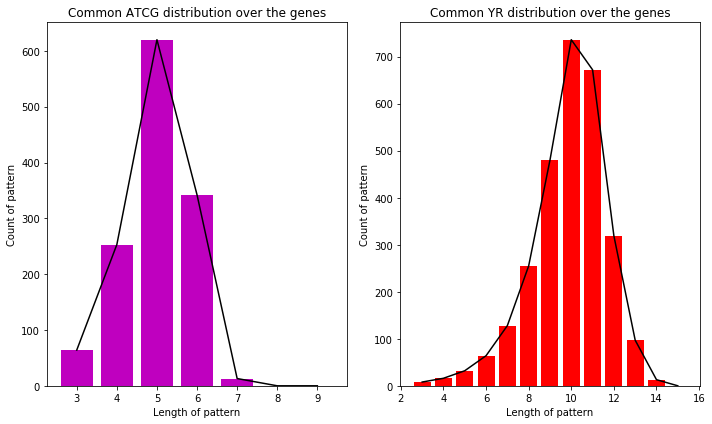

In [0]:

# YR distribution plot
yr_data = np.array([8,16,32,64,128,255,480,736,672,319,97,13,0])
yr_x_axis = range(3,16)

atcg_data = [64,253,620,342,13,0,0]
atcg_x_axis = range(3,10)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

ax[0].bar(atcg_x_axis,atcg_data,color='m')
ax[0].plot(atcg_x_axis,atcg_data,color='k')
ax[0].set_title('Common ATCG distribution over the genes')
ax[0].set_xlabel("Length of pattern")
ax[0].set_ylabel("Count of pattern")


ax[1].bar(yr_x_axis,yr_data,color='r')
ax[1].set_title('Common YR distribution over the genes')
ax[1].plot(yr_x_axis,yr_data,color='k')
ax[1].set_xlabel("Length of pattern")
ax[1].set_ylabel("Count of pattern")
fig.tight_layout()

# FINDING PATTERNS FOR PARKIN

## ATCG DISTRIBUTION

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',3)

64 : ['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',4)

241 : ['AAAA', 'AAAC', 'AAAG', 'AAAT', 'AACA', 'AACC', 'AACG', 'AACT', 'AAGA', 'AAGC', 'AAGG', 'AAGT', 'AATA', 'AATC', 'AATG', 'AATT', 'ACAA', 'ACAC', 'ACAG', 'ACAT', 'ACCA', 'ACCC', 'ACCG', 'ACCT', 'ACGA', 'ACGC', 'ACGT', 'ACTA', 'ACTC', 'ACTG', 'ACTT', 'AGAA', 'AGAC', 'AGAG', 'AGAT', 'AGCA', 'AGCC', 'AGCG', 'AGCT', 'AGGA', 'AGGC', 'AGGG', 'AGGT', 'AGTA', 'AGTC', 'AGTG', 'AGTT', 'ATAA', 'ATAC', 'ATAG', 'ATCA', 'ATCC', 'ATCG', 'ATCT', 'ATGA', 'ATGC', 'ATGG', 'ATGT', 'ATTA', 'ATTC', 'ATTG', 'ATTT', 'CAAA', 'CAAC', 'CAAG', 'CAAT', 'CACC', 'CACG', 'CACT', 'CAGA', 'CAGC', 'CAGG', 'CAGT', 'CATA', 'CATC', 'CATG', 'CATT', 'CCAA', 'CCAG', 'CCAT', 'CCCA', 'CCCC', 'CCCG', 'CCCT', 'CCGA', 'CCGC', 'CCGG', 'CCTA', 'CCTC', 'CCTG', 'CCTT', 'CGAC', 'CGAG', 'CGAT', 'CGCA', 'CGCC', 'CGCG', 'CGCT', 'CGGA', 'CGGC', 'CGGG', 'CGGT', 'CGTC', 'CGTG', 'CTAA', 'CTAC', 'CTAG', 'CTAT', 'CTCA', 'CTCC', 'CTCG', 'CTCT', 'CTGA', 'CTGC', 'CTGG', 'CTGT', 'CTTA', 'CTTC', 'CTTG', 'CTTT', 'GAAA', 'GAAC', 'GAAG', 'GAAT', '

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',5)

402 : ['AAAAG', 'AAAAT', 'AAACC', 'AAACT', 'AAAGC', 'AAATG', 'AACAG', 'AACCC', 'AACTC', 'AACTG', 'AACTT', 'AAGAA', 'AAGAG', 'AAGCA', 'AAGCC', 'AAGCT', 'AAGGA', 'AAGGC', 'AAGGG', 'AAGGT', 'AAGTG', 'AAGTT', 'AATCC', 'AATGG', 'AATGT', 'AATTC', 'ACAAC', 'ACAAG', 'ACACC', 'ACAGG', 'ACATC', 'ACCAG', 'ACCCT', 'ACCGG', 'ACCTG', 'ACGCA', 'ACGTG', 'ACTAC', 'ACTCA', 'ACTCT', 'ACTGC', 'ACTGG', 'ACTTC', 'ACTTT', 'AGAAA', 'AGAAG', 'AGAGA', 'AGAGC', 'AGAGG', 'AGAGT', 'AGATC', 'AGATT', 'AGCAG', 'AGCCA', 'AGCCC', 'AGCCG', 'AGCCT', 'AGCTG', 'AGCTT', 'AGGAA', 'AGGAG', 'AGGCC', 'AGGCG', 'AGGCT', 'AGGGA', 'AGGGC', 'AGGGG', 'AGGTC', 'AGGTG', 'AGGTT', 'AGTCT', 'AGTGA', 'AGTGG', 'AGTGT', 'AGTTT', 'ATAAA', 'ATCAC', 'ATCCA', 'ATCCC', 'ATCCT', 'ATGAG', 'ATGAT', 'ATGCA', 'ATGGC', 'ATGGT', 'ATGTG', 'ATGTT', 'ATTGG', 'ATTTT', 'CAAGA', 'CAAGC', 'CAAGG', 'CAAGT', 'CACCA', 'CACCC', 'CACCT', 'CACGC', 'CACTC', 'CAGAA', 'CAGAG', 'CAGAT', 'CAGCA', 'CAGCC', 'CAGCT', 'CAGGA', 'CAGGC', 'CAGGT', 'CAGTA', 'CAGTC', 'CAGTG', 'CA

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',6)

100 : ['AAGAGG', 'AAGCAG', 'AAGGAG', 'AAGGTG', 'ACACCA', 'ACCTGT', 'ACTCTG', 'AGAAGG', 'AGAGGA', 'AGCAGC', 'AGCTGG', 'AGGAAG', 'AGGAGA', 'AGGAGC', 'AGGGGA', 'AGGTGG', 'AGTGGA', 'AGTGGG', 'CAGAAG', 'CAGCAG', 'CAGCTG', 'CAGTGG', 'CATGGT', 'CCAGGA', 'CCCTGC', 'CCTCTC', 'CCTGAC', 'CCTGGA', 'CGGGAG', 'CTCTGC', 'CTGACC', 'CTGAGG', 'CTGGAA', 'CTGGAG', 'CTGGCC', 'CTGGGC', 'CTTGTG', 'GAAAAG', 'GAAGAA', 'GAAGAG', 'GAAGCC', 'GAAGGA', 'GAAGTG', 'GAGAAG', 'GAGGAA', 'GAGGAG', 'GAGGTG', 'GCAGGC', 'GCAGTG', 'GCTCTG', 'GCTGAG', 'GCTGGA', 'GCTGGG', 'GGAAGA', 'GGAAGC', 'GGAAGG', 'GGAAGT', 'GGAGCA', 'GGAGCC', 'GGAGGC', 'GGAGGT', 'GGGAAG', 'GGGAGG', 'GGGCCT', 'GGGGAG', 'GGGGCT', 'GGGGGA', 'GGGTGG', 'GGTGGA', 'GGTGGG', 'GTCCTG', 'GTGAGA', 'GTGGAG', 'GTGGGG', 'GTGGGT', 'GTGGTT', 'GTGTGA', 'GTGTGG', 'GTTGGG', 'TAAAAT', 'TCCCTG', 'TCCTGG', 'TCTGAC', 'TCTGAG', 'TGAAGG', 'TGAGGA', 'TGCCCC', 'TGGAAG', 'TGGAGC', 'TGGCTG', 'TGGGAT', 'TGGGCC', 'TGGGGG', 'TGTGGA', 'TTCAGC', 'TTCCCC', 'TTGGCT', 'TTTCTT', 'TTTTCT', 'TT

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',7)

2 : ['CCTGACC', 'GGAGGTG']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',8)

0 : []


## YR DISTRIBUTION

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',3,MODE='YR')

8 : ['RRR', 'RRY', 'RYR', 'RYY', 'YRR', 'YRY', 'YYR', 'YYY']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',4,MODE='YR')

16 : ['RRRR', 'RRRY', 'RRYR', 'RRYY', 'RYRR', 'RYRY', 'RYYR', 'RYYY', 'YRRR', 'YRRY', 'YRYR', 'YRYY', 'YYRR', 'YYRY', 'YYYR', 'YYYY']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',5,MODE='YR')

32 : ['RRRRR', 'RRRRY', 'RRRYR', 'RRRYY', 'RRYRR', 'RRYRY', 'RRYYR', 'RRYYY', 'RYRRR', 'RYRRY', 'RYRYR', 'RYRYY', 'RYYRR', 'RYYRY', 'RYYYR', 'RYYYY', 'YRRRR', 'YRRRY', 'YRRYR', 'YRRYY', 'YRYRR', 'YRYRY', 'YRYYR', 'YRYYY', 'YYRRR', 'YYRRY', 'YYRYR', 'YYRYY', 'YYYRR', 'YYYRY', 'YYYYR', 'YYYYY']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',6,MODE='YR')

64 : ['RRRRRR', 'RRRRRY', 'RRRRYR', 'RRRRYY', 'RRRYRR', 'RRRYRY', 'RRRYYR', 'RRRYYY', 'RRYRRR', 'RRYRRY', 'RRYRYR', 'RRYRYY', 'RRYYRR', 'RRYYRY', 'RRYYYR', 'RRYYYY', 'RYRRRR', 'RYRRRY', 'RYRRYR', 'RYRRYY', 'RYRYRR', 'RYRYRY', 'RYRYYR', 'RYRYYY', 'RYYRRR', 'RYYRRY', 'RYYRYR', 'RYYRYY', 'RYYYRR', 'RYYYRY', 'RYYYYR', 'RYYYYY', 'YRRRRR', 'YRRRRY', 'YRRRYR', 'YRRRYY', 'YRRYRR', 'YRRYRY', 'YRRYYR', 'YRRYYY', 'YRYRRR', 'YRYRRY', 'YRYRYR', 'YRYRYY', 'YRYYRR', 'YRYYRY', 'YRYYYR', 'YRYYYY', 'YYRRRR', 'YYRRRY', 'YYRRYR', 'YYRRYY', 'YYRYRR', 'YYRYRY', 'YYRYYR', 'YYRYYY', 'YYYRRR', 'YYYRRY', 'YYYRYR', 'YYYRYY', 'YYYYRR', 'YYYYRY', 'YYYYYR', 'YYYYYY']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',7,MODE='YR')

128 : ['RRRRRRR', 'RRRRRRY', 'RRRRRYR', 'RRRRRYY', 'RRRRYRR', 'RRRRYRY', 'RRRRYYR', 'RRRRYYY', 'RRRYRRR', 'RRRYRRY', 'RRRYRYR', 'RRRYRYY', 'RRRYYRR', 'RRRYYRY', 'RRRYYYR', 'RRRYYYY', 'RRYRRRR', 'RRYRRRY', 'RRYRRYR', 'RRYRRYY', 'RRYRYRR', 'RRYRYRY', 'RRYRYYR', 'RRYRYYY', 'RRYYRRR', 'RRYYRRY', 'RRYYRYR', 'RRYYRYY', 'RRYYYRR', 'RRYYYRY', 'RRYYYYR', 'RRYYYYY', 'RYRRRRR', 'RYRRRRY', 'RYRRRYR', 'RYRRRYY', 'RYRRYRR', 'RYRRYRY', 'RYRRYYR', 'RYRRYYY', 'RYRYRRR', 'RYRYRRY', 'RYRYRYR', 'RYRYRYY', 'RYRYYRR', 'RYRYYRY', 'RYRYYYR', 'RYRYYYY', 'RYYRRRR', 'RYYRRRY', 'RYYRRYR', 'RYYRRYY', 'RYYRYRR', 'RYYRYRY', 'RYYRYYR', 'RYYRYYY', 'RYYYRRR', 'RYYYRRY', 'RYYYRYR', 'RYYYRYY', 'RYYYYRR', 'RYYYYRY', 'RYYYYYR', 'RYYYYYY', 'YRRRRRR', 'YRRRRRY', 'YRRRRYR', 'YRRRRYY', 'YRRRYRR', 'YRRRYRY', 'YRRRYYR', 'YRRRYYY', 'YRRYRRR', 'YRRYRRY', 'YRRYRYR', 'YRRYRYY', 'YRRYYRR', 'YRRYYRY', 'YRRYYYR', 'YRRYYYY', 'YRYRRRR', 'YRYRRRY', 'YRYRRYR', 'YRYRRYY', 'YRYRYRR', 'YRYRYRY', 'YRYRYYR', 'YRYRYYY', 'YRYYRRR', 'YRYYRRY', 'YR

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',8,MODE='YR')

254 : ['RRRRRRRR', 'RRRRRRRY', 'RRRRRRYR', 'RRRRRRYY', 'RRRRRYRR', 'RRRRRYRY', 'RRRRRYYR', 'RRRRRYYY', 'RRRRYRRR', 'RRRRYRRY', 'RRRRYRYR', 'RRRRYRYY', 'RRRRYYRR', 'RRRRYYRY', 'RRRRYYYR', 'RRRRYYYY', 'RRRYRRRR', 'RRRYRRRY', 'RRRYRRYR', 'RRRYRRYY', 'RRRYRYRR', 'RRRYRYRY', 'RRRYRYYR', 'RRRYRYYY', 'RRRYYRRR', 'RRRYYRRY', 'RRRYYRYR', 'RRRYYRYY', 'RRRYYYRR', 'RRRYYYRY', 'RRRYYYYR', 'RRRYYYYY', 'RRYRRRRR', 'RRYRRRRY', 'RRYRRRYR', 'RRYRRRYY', 'RRYRRYRR', 'RRYRRYRY', 'RRYRRYYR', 'RRYRRYYY', 'RRYRYRRR', 'RRYRYRRY', 'RRYRYRYR', 'RRYRYRYY', 'RRYRYYRR', 'RRYRYYRY', 'RRYRYYYR', 'RRYRYYYY', 'RRYYRRRR', 'RRYYRRRY', 'RRYYRRYR', 'RRYYRRYY', 'RRYYRYRR', 'RRYYRYRY', 'RRYYRYYR', 'RRYYRYYY', 'RRYYYRRR', 'RRYYYRRY', 'RRYYYRYR', 'RRYYYRYY', 'RRYYYYRR', 'RRYYYYRY', 'RRYYYYYR', 'RRYYYYYY', 'RYRRRRRR', 'RYRRRRRY', 'RYRRRRYR', 'RYRRRRYY', 'RYRRRYRR', 'RYRRRYRY', 'RYRRRYYR', 'RYRRRYYY', 'RYRRYRRR', 'RYRRYRRY', 'RYRRYRYR', 'RYRRYRYY', 'RYRRYYRR', 'RYRRYYRY', 'RYRRYYYR', 'RYRRYYYY', 'RYRYRRRR', 'RYRYRRRY', 'RYRYRRYR

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',9,MODE='YR')

448 : ['RRRRRRRRR', 'RRRRRRRRY', 'RRRRRRRYR', 'RRRRRRRYY', 'RRRRRRYRR', 'RRRRRRYRY', 'RRRRRRYYR', 'RRRRRRYYY', 'RRRRRYRRR', 'RRRRRYRRY', 'RRRRRYRYR', 'RRRRRYRYY', 'RRRRRYYRR', 'RRRRRYYRY', 'RRRRRYYYR', 'RRRRRYYYY', 'RRRRYRRRR', 'RRRRYRRRY', 'RRRRYRRYR', 'RRRRYRRYY', 'RRRRYRYRR', 'RRRRYRYRY', 'RRRRYRYYR', 'RRRRYRYYY', 'RRRRYYRRR', 'RRRRYYRRY', 'RRRRYYRYR', 'RRRRYYRYY', 'RRRRYYYRR', 'RRRRYYYRY', 'RRRRYYYYR', 'RRRRYYYYY', 'RRRYRRRRR', 'RRRYRRRRY', 'RRRYRRRYR', 'RRRYRRRYY', 'RRRYRRYRR', 'RRRYRRYRY', 'RRRYRRYYR', 'RRRYRRYYY', 'RRRYRYRRR', 'RRRYRYRRY', 'RRRYRYRYR', 'RRRYRYYRR', 'RRRYRYYYR', 'RRRYRYYYY', 'RRRYYRRRR', 'RRRYYRRRY', 'RRRYYRRYR', 'RRRYYRRYY', 'RRRYYRYRR', 'RRRYYRYYR', 'RRRYYRYYY', 'RRRYYYRRR', 'RRRYYYRRY', 'RRRYYYRYR', 'RRRYYYRYY', 'RRRYYYYRR', 'RRRYYYYRY', 'RRRYYYYYR', 'RRRYYYYYY', 'RRYRRRRRR', 'RRYRRRRRY', 'RRYRRRRYR', 'RRYRRRRYY', 'RRYRRRYRR', 'RRYRRRYRY', 'RRYRRRYYR', 'RRYRRRYYY', 'RRYRRYRRR', 'RRYRRYRRY', 'RRYRRYRYR', 'RRYRRYRYY', 'RRYRRYYRR', 'RRYRRYYRY', 'RRYRRYYYR', 'RRYR

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',10,MODE='YR')

534 : ['RRRRRRRRRR', 'RRRRRRRRRY', 'RRRRRRRRYR', 'RRRRRRRRYY', 'RRRRRRRYRR', 'RRRRRRRYRY', 'RRRRRRRYYR', 'RRRRRRRYYY', 'RRRRRRYRRR', 'RRRRRRYRRY', 'RRRRRRYRYR', 'RRRRRRYRYY', 'RRRRRRYYRR', 'RRRRRRYYRY', 'RRRRRRYYYR', 'RRRRRRYYYY', 'RRRRRYRRRR', 'RRRRRYRRRY', 'RRRRRYRRYR', 'RRRRRYRRYY', 'RRRRRYRYRR', 'RRRRRYRYRY', 'RRRRRYRYYR', 'RRRRRYRYYY', 'RRRRRYYRRR', 'RRRRRYYRRY', 'RRRRRYYRYR', 'RRRRRYYYRR', 'RRRRRYYYYR', 'RRRRRYYYYY', 'RRRRYRRRRR', 'RRRRYRRRRY', 'RRRRYRRRYR', 'RRRRYRRRYY', 'RRRRYRRYRR', 'RRRRYRRYRY', 'RRRRYRRYYY', 'RRRRYRYRRR', 'RRRRYRYRRY', 'RRRRYRYYRR', 'RRRRYRYYYR', 'RRRRYRYYYY', 'RRRRYYRRRR', 'RRRRYYRRRY', 'RRRRYYRRYR', 'RRRRYYRRYY', 'RRRRYYRYRR', 'RRRRYYYRRR', 'RRRRYYYRRY', 'RRRRYYYRYR', 'RRRRYYYRYY', 'RRRRYYYYRR', 'RRRRYYYYRY', 'RRRRYYYYYR', 'RRRRYYYYYY', 'RRRYRRRRRR', 'RRRYRRRRRY', 'RRRYRRRRYR', 'RRRYRRRRYY', 'RRRYRRRYRR', 'RRRYRRRYRY', 'RRRYRRRYYR', 'RRRYRRRYYY', 'RRRYRRYRRR', 'RRRYRRYRYR', 'RRRYRRYRYY', 'RRRYRRYYRR', 'RRRYRRYYRY', 'RRRYRRYYYY', 'RRRYRYRRRR', 'RRRYRYRRRY',

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',11,MODE='YR')

344 : ['RRRRRRRRRRR', 'RRRRRRRRRRY', 'RRRRRRRRRYR', 'RRRRRRRRYRR', 'RRRRRRRRYRY', 'RRRRRRRRYYR', 'RRRRRRRRYYY', 'RRRRRRRYRRR', 'RRRRRRRYRRY', 'RRRRRRRYRYY', 'RRRRRRRYYRR', 'RRRRRRRYYRY', 'RRRRRRRYYYR', 'RRRRRRRYYYY', 'RRRRRRYRRRR', 'RRRRRRYRRRY', 'RRRRRRYRRYR', 'RRRRRRYRYYR', 'RRRRRRYRYYY', 'RRRRRRYYRRR', 'RRRRRRYYRYR', 'RRRRRRYYYRR', 'RRRRRYRRRRR', 'RRRRRYRRRYR', 'RRRRRYRRYRR', 'RRRRRYRRYRY', 'RRRRRYRRYYY', 'RRRRRYRYRRR', 'RRRRRYYRRRR', 'RRRRRYYRRRY', 'RRRRRYYRRYY', 'RRRRRYYRYRR', 'RRRRRYYYRRR', 'RRRRRYYYYRR', 'RRRRRYYYYRY', 'RRRRRYYYYYR', 'RRRRYRRRRRR', 'RRRRYRRRRRY', 'RRRRYRRRRYY', 'RRRRYRRRYRR', 'RRRRYRRYRRR', 'RRRRYRRYRYY', 'RRRRYRRYYYY', 'RRRRYRYRRRR', 'RRRRYRYRRRY', 'RRRRYRYYRRY', 'RRRRYRYYYYY', 'RRRRYYRRYYY', 'RRRRYYRYRRR', 'RRRRYYYRRRR', 'RRRRYYYRRYY', 'RRRRYYYYRRR', 'RRRRYYYYYRR', 'RRRRYYYYYRY', 'RRRRYYYYYYR', 'RRRYRRRRRRY', 'RRRYRRRRRYR', 'RRRYRRRRYYR', 'RRRYRRRYRRR', 'RRRYRRRYRRY', 'RRRYRRRYYRR', 'RRRYRRRYYRY', 'RRRYRRYRYRR', 'RRRYRRYRYYY', 'RRRYRRYYRRR', 'RRRYRYRRRRR', 'RR

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',12,MODE='YR')

110 : ['RRRRRRRRRRRY', 'RRRRRRRRRRYR', 'RRRRRRRRRYRR', 'RRRRRRRRRYRY', 'RRRRRRRRYRRR', 'RRRRRRRRYYRR', 'RRRRRRRRYYRY', 'RRRRRRRRYYYR', 'RRRRRRRYRRRR', 'RRRRRRRYYYRR', 'RRRRRRYRRRRR', 'RRRRRRYRRYRR', 'RRRRRRYRRYRY', 'RRRRRRYYRRRY', 'RRRRRRYYRYRR', 'RRRRRRYYYRRR', 'RRRRRYRRRRRY', 'RRRRRYRRYRRR', 'RRRRRYRYRRRR', 'RRRRRYYYRRRR', 'RRRRYRRRRRRY', 'RRRRYRRRRRYR', 'RRRRYRRRYRRR', 'RRRRYRYRRRRR', 'RRRRYRYYRRYR', 'RRRRYYRRYYYY', 'RRRRYYYYRRRY', 'RRRRYYYYYRRR', 'RRRYRRRYRRRR', 'RRRYRYYRRYRR', 'RRRYYRRRYRRR', 'RRRYYRRRYYRR', 'RRRYYYRRRRRY', 'RRRYYYRRRYRY', 'RRRYYYRRYYYY', 'RRRYYYRYRYYY', 'RRRYYYYYRRRR', 'RRYRRRRRRRRR', 'RRYRRRRRYYRR', 'RRYRRRRRYYYY', 'RRYRRRRYYYYY', 'RRYRRYRRYYRR', 'RRYRRYYRRRRR', 'RRYRYRRRRRRR', 'RRYRYYYRYYRR', 'RRYYRRRRRRYR', 'RRYYRRRRRRYY', 'RRYYRYRRRYRY', 'RRYYYRRRRRYY', 'RRYYYYRRRYRR', 'RYRRRRRRRRRR', 'RYRRRRRRRRYY', 'RYRRRRRYYYYR', 'RYRRYYRRRRRR', 'RYRYRRRRRRRR', 'RYRYRRRRRYYR', 'RYRYYYRRRRRY', 'RYYRRRRRRYRR', 'RYYYRRRRRYRR', 'RYYYRRRYYYRR', 'RYYYYRRRRRYR', 'RYYYYRRRRYRR', '

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',13,MODE='YR')

24 : ['RRRRRRRRRRRYR', 'RRRRRRRRRRYRR', 'RRRRRRRRRRYRY', 'RRRRRRRRRYRRR', 'RRRRRRRRYRRRR', 'RRRRRRRYRRRRR', 'RRRRRRYRRRRRY', 'RRRRRYRYRRRRR', 'RRRRYRRRYRRRR', 'RRRYYYRRRRRYY', 'RYRRRRRRRRRRR', 'RYYYYRRRRRYRR', 'RYYYYYRRRRRYY', 'RYYYYYRYYYYRR', 'YRRRRYYYYYRRR', 'YRYRRRRRRRRRR', 'YRYYYYYYYYYRY', 'YYRRRYYYRRRRR', 'YYYRRRYYYRRRR', 'YYYRYRRRRRRRR', 'YYYYRRRRRYYYY', 'YYYYYRRRRRYYY', 'YYYYYYRRRRYRR', 'YYYYYYYRRRRYR']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',14,MODE='YR')

2 : ['RRRRRRRRRYRRRR', 'YYYYYYYRRRRYRR']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PARKIN',15,MODE='YR')

0 : []


## RESULT

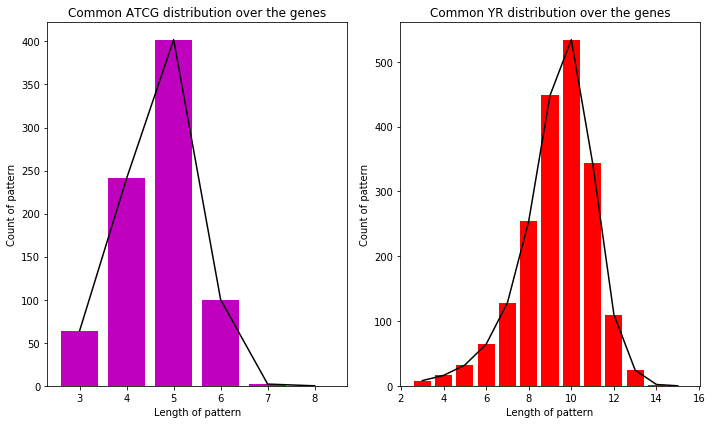

In [0]:
# YR distribution plot
yr_data = np.array([8,16,32,64,128,254,448,534,344,110,24,2,0])
yr_x_axis = range(3,16)

atcg_data = np.array([64,241,402,100,2,0])
atcg_x_axis = range(3,9)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

ax[0].bar(atcg_x_axis,atcg_data,color='m')
ax[0].plot(atcg_x_axis,atcg_data,color='k')
ax[0].set_title('Common ATCG distribution over the genes')
ax[0].set_xlabel("Length of pattern")
ax[0].set_ylabel("Count of pattern")


ax[1].bar(yr_x_axis,yr_data,color='r')
ax[1].set_title('Common YR distribution over the genes')
ax[1].plot(yr_x_axis,yr_data,color='k')
ax[1].set_xlabel("Length of pattern")
ax[1].set_ylabel("Count of pattern")
fig.tight_layout()

# FINDING PATTERNS FOR PINK1

## ATCG DISTRIBUTION

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',3)

64 : ['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',4)

247 : ['AAAA', 'AAAC', 'AAAG', 'AAAT', 'AACA', 'AACC', 'AACG', 'AACT', 'AAGA', 'AAGC', 'AAGG', 'AAGT', 'AATA', 'AATC', 'AATG', 'AATT', 'ACAA', 'ACAC', 'ACAG', 'ACAT', 'ACCA', 'ACCC', 'ACCG', 'ACCT', 'ACGC', 'ACGT', 'ACTA', 'ACTC', 'ACTG', 'ACTT', 'AGAA', 'AGAC', 'AGAG', 'AGAT', 'AGCA', 'AGCC', 'AGCG', 'AGCT', 'AGGA', 'AGGC', 'AGGG', 'AGGT', 'AGTA', 'AGTC', 'AGTG', 'AGTT', 'ATAA', 'ATAC', 'ATAG', 'ATCA', 'ATCC', 'ATCT', 'ATGA', 'ATGC', 'ATGG', 'ATGT', 'ATTA', 'ATTC', 'ATTG', 'ATTT', 'CAAA', 'CAAC', 'CAAG', 'CAAT', 'CACC', 'CACG', 'CACT', 'CAGA', 'CAGC', 'CAGG', 'CAGT', 'CATA', 'CATC', 'CATG', 'CATT', 'CCAA', 'CCAG', 'CCAT', 'CCCA', 'CCCC', 'CCCG', 'CCCT', 'CCGA', 'CCGC', 'CCGG', 'CCGT', 'CCTA', 'CCTC', 'CCTG', 'CCTT', 'CGAA', 'CGAC', 'CGAG', 'CGAT', 'CGCA', 'CGCC', 'CGCG', 'CGCT', 'CGGA', 'CGGC', 'CGGG', 'CGGT', 'CGTA', 'CGTC', 'CGTG', 'CGTT', 'CTAA', 'CTAC', 'CTAG', 'CTAT', 'CTCA', 'CTCC', 'CTCG', 'CTCT', 'CTGA', 'CTGC', 'CTGG', 'CTGT', 'CTTA', 'CTTC', 'CTTG', 'CTTT', 'GAAA', 'GAAC', '

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',5)

445 : ['AAAAC', 'AAAAG', 'AAAAT', 'AAACC', 'AAACT', 'AAAGA', 'AAAGG', 'AAATA', 'AAATG', 'AAATT', 'AACAC', 'AACAT', 'AACTA', 'AACTC', 'AACTG', 'AACTT', 'AAGAA', 'AAGAT', 'AAGCA', 'AAGCC', 'AAGCT', 'AAGGC', 'AAGGG', 'AAGGT', 'AAGTG', 'AAGTT', 'AATAC', 'AATCC', 'AATGA', 'AATGC', 'AATGG', 'AATGT', 'AATTC', 'AATTT', 'ACAAG', 'ACAAT', 'ACACC', 'ACACT', 'ACAGG', 'ACAGT', 'ACCAG', 'ACCAT', 'ACCCT', 'ACCTG', 'ACCTT', 'ACTAG', 'ACTAT', 'ACTCA', 'ACTCT', 'ACTGC', 'ACTGG', 'ACTTA', 'ACTTC', 'ACTTT', 'AGAAA', 'AGAAG', 'AGAAT', 'AGACC', 'AGAGA', 'AGAGC', 'AGAGG', 'AGAGT', 'AGATC', 'AGATG', 'AGATT', 'AGCAG', 'AGCCA', 'AGCCT', 'AGCTG', 'AGCTT', 'AGGAA', 'AGGAG', 'AGGAT', 'AGGCA', 'AGGCC', 'AGGCG', 'AGGCT', 'AGGGA', 'AGGGC', 'AGGGG', 'AGGTA', 'AGGTG', 'AGTCT', 'AGTGA', 'AGTGC', 'AGTGG', 'AGTGT', 'AGTTA', 'AGTTC', 'AGTTT', 'ATAAA', 'ATAGT', 'ATCCA', 'ATCCC', 'ATCCT', 'ATCTT', 'ATGGC', 'ATGGG', 'ATGGT', 'ATGTG', 'ATGTT', 'ATTCA', 'ATTCC', 'ATTCT', 'ATTGA', 'ATTGG', 'ATTTA', 'ATTTC', 'ATTTG', 'ATTTT', 'CA

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',6)

87 : ['AAAAGA', 'AAAATG', 'AAGCCT', 'ACCTGT', 'ACTCTG', 'AGATGG', 'AGCAGA', 'AGCAGC', 'AGCCTT', 'AGCTGG', 'AGCTTT', 'AGGAGA', 'AGGGGA', 'AGGGGT', 'AGGTGG', 'AGTTTG', 'ATCCCT', 'ATGTTT', 'ATTTAA', 'ATTTTT', 'CACCTG', 'CAGTGG', 'CAGTTT', 'CCAGGA', 'CCCTGC', 'CCTCCC', 'CCTGAC', 'CCTGGA', 'CCTTTC', 'CTCCCG', 'CTCTGC', 'CTCTTT', 'CTGACC', 'CTGACT', 'CTGGAG', 'CTGGCC', 'CTGGGC', 'CTTTCC', 'CTTTGC', 'GAAATA', 'GAAGCC', 'GAGGTG', 'GATTTT', 'GCAGCC', 'GCAGCT', 'GCCTTT', 'GCTCTG', 'GCTGGA', 'GCTGGG', 'GCTGTG', 'GCTTCT', 'GCTTTG', 'GGAAGC', 'GGAGGC', 'GGAGGT', 'GGCTGT', 'GGGAAG', 'GGTGGG', 'GTATTT', 'GTGACA', 'GTGAGC', 'GTGGAG', 'GTGTGG', 'GTTTTC', 'TCCTGA', 'TCTGCA', 'TCTGTC', 'TGACCT', 'TGCAGA', 'TGGTGA', 'TGTCCC', 'TGTTTT', 'TTATTT', 'TTCCCC', 'TTGCCT', 'TTGGCT', 'TTGTTT', 'TTTCAG', 'TTTCTG', 'TTTCTT', 'TTTGTT', 'TTTTAG', 'TTTTCC', 'TTTTCT', 'TTTTGT', 'TTTTTA', 'TTTTTT']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',7)

4 : ['CCTGACC', 'GAGGTGG', 'TTGTTTT', 'TTTGTTT']


In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',8)

## YR DISTRIBUTION

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',3,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',4,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',5,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',6,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',7,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',8,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',9,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',10,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',11,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',12,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',13,MODE='YR')

In [0]:
common_patterns_diff_lengths_among_all('/gdrive/My Drive/Genomics/job/data/PINK1',14,MODE='YR')

## RESULT

In [0]:
# YR distribution plot
yr_data = np.array([8,16,32,64,128,255,455,546,279,68,5,0])
yr_x_axis = range(3,15)

atcg_data = np.array([64,247,445,87,40,0])

atcg_x_axis = range(3,9)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

ax[0].bar(atcg_x_axis,atcg_data,color='m')
ax[0].plot(atcg_x_axis,atcg_data,color='k')
ax[0].set_title('Common ATCG distribution over the genes')
ax[0].set_xlabel("Length of pattern")
ax[0].set_ylabel("Count of pattern")


ax[1].bar(yr_x_axis,yr_data,color='r')
ax[1].set_title('Common YR distribution over the genes')
ax[1].plot(yr_x_axis,yr_data,color='k')
ax[1].set_xlabel("Length of pattern")
ax[1].set_ylabel("Count of pattern")
fig.tight_layout()

# FINAL GRAPH

In [0]:
dj1 = np.array([8,16,32,64,128,255,480,736,672,319,97,13,0])
parkin = np.array([8,16,32,64,128,254,448,534,344,110,24, 2,0])
pink1 = np.array([8,16,32,64,128,255,455,546,279,68, 5, 0, 0])


purple_patch = mpatches.Patch(color='purple', label='DJ1')
green_patch = mpatches.Patch(color='green',label ='PARKIN')
red_patch = mpatches.Patch(color="red",label="PINK1")
plt.legend(handles=[purple_patch,green_patch,red_patch])
x_axis = range(3,16)
plt.plot(x_axis,dj1,color='purple')
plt.plot(x_axis,parkin,color='green')
plt.plot(x_axis,pink1,color='red')
plt.title('YR pattern distributions over the 3 networks')
plt.xlabel("Pattern length")
plt.ylabel("Pattern count")
plt.show()